In [2]:
import numpy as np
import pandas as pd

### Load-in dataset

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [4]:
df_can.info

<bound method DataFrame.info of            Type    Coverage          OdName  AREA AreaName   REG  \
0    Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1    Immigrants  Foreigners         Albania   908   Europe   925   
2    Immigrants  Foreigners         Algeria   903   Africa   912   
3    Immigrants  Foreigners  American Samoa   909  Oceania   957   
4    Immigrants  Foreigners         Andorra   908   Europe   925   
..          ...         ...             ...   ...      ...   ...   
190  Immigrants  Foreigners        Viet Nam   935     Asia   920   
191  Immigrants  Foreigners  Western Sahara   903   Africa   912   
192  Immigrants  Foreigners           Yemen   935     Asia   922   
193  Immigrants  Foreigners          Zambia   903   Africa   910   
194  Immigrants  Foreigners        Zimbabwe   903   Africa   910   

                RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0         Southern Asia  902  Developing regions    16  ...  2978  343

In [5]:
# List of columns
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [6]:
# Dimensions (rows,columns)
df_can.shape

(195, 43)

In [7]:
# Clean data
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(5)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
# Rename columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [9]:
# Create 'total' column that sums up total immigrants by country over the entire period
df_can['Total'] = df_can.sum(axis=1)

In [10]:
# Summary
df_can.describe

<bound method NDFrame.describe of             Country Continent              Region             DevName  1980  \
0       Afghanistan      Asia       Southern Asia  Developing regions    16   
1           Albania    Europe     Southern Europe   Developed regions     1   
2           Algeria    Africa     Northern Africa  Developing regions    80   
3    American Samoa   Oceania           Polynesia  Developing regions     0   
4           Andorra    Europe     Southern Europe   Developed regions     0   
..              ...       ...                 ...                 ...   ...   
190        Viet Nam      Asia  South-Eastern Asia  Developing regions  1191   
191  Western Sahara    Africa     Northern Africa  Developing regions     0   
192           Yemen      Asia        Western Asia  Developing regions     1   
193          Zambia    Africa      Eastern Africa  Developing regions    11   
194        Zimbabwe    Africa      Eastern Africa  Developing regions    72   

     1981  1982  

In [11]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


### Visualizing Data

In [12]:
# using inline backend
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
# Selecting a style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [14]:
mpl.style.use(['dark_background'])

### Selecting Rows

In [15]:
# Set an index so that we can easily select rows by country
df_can.set_index('Country', inplace=True)
# df_can.reset_index() will reset the index

In [16]:
# Now we can locate rows by country
# Locate number of immigrants from japan
print(df_can.loc['Japan'])

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [17]:
# Some more prep before visualizing
# Converting column names into strings
df_can.columns = list(map(str, df_can.columns))

# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Line Plots

In [18]:
# Plotting Haiti data
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

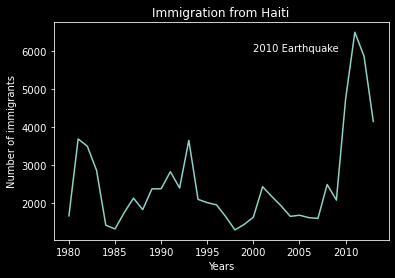

In [19]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake')

plt.show() 

In [20]:
# Plotting China and India Data
df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [21]:
# Must Transpose since output is a dataframe
df_CI = df_CI.transpose()
df_CI.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


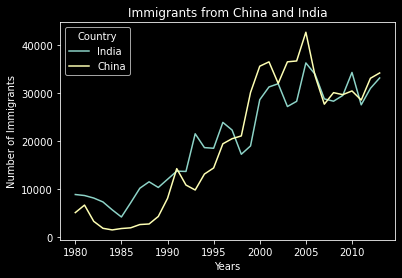

In [22]:
df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Area Plots

In [23]:
# Create dataframe with top five countries
# Sort first
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


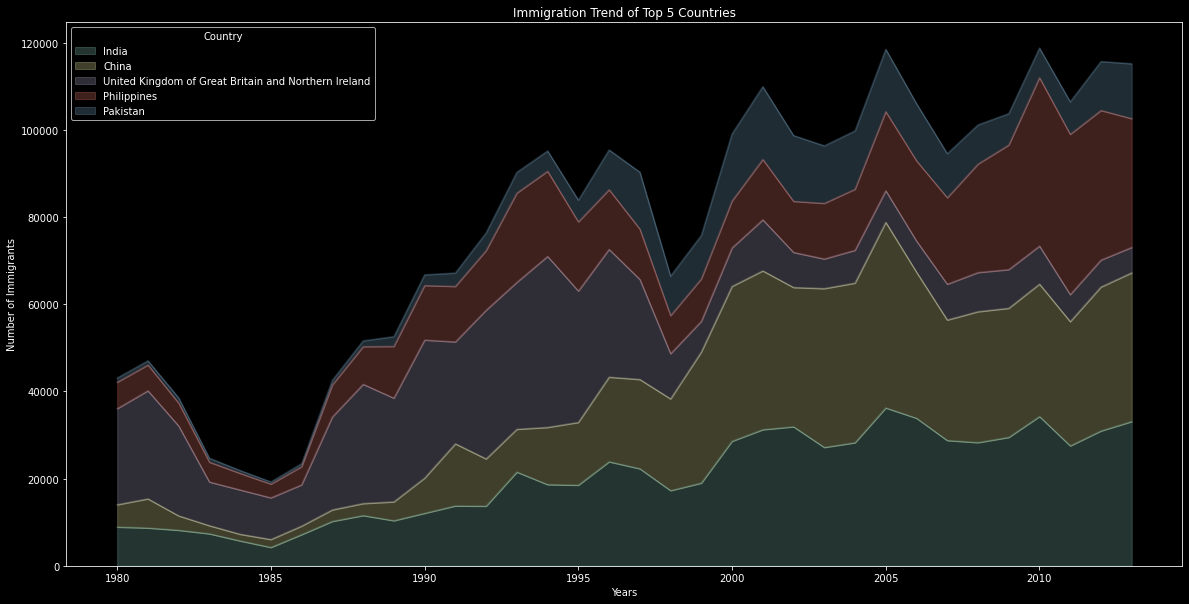

In [27]:
# Stacked Plot
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             alpha=.25,# Transparency value
             stacked=True, 
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Histograms

In [28]:
# Breaking data into bins using np
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


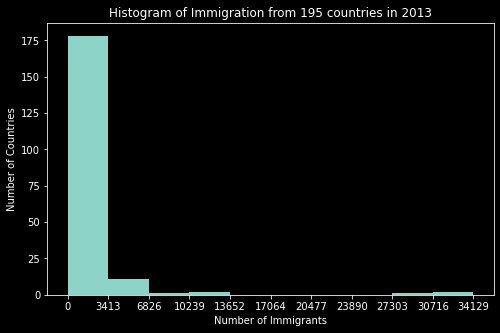

In [29]:
# Plotting Histogram for 2013
df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

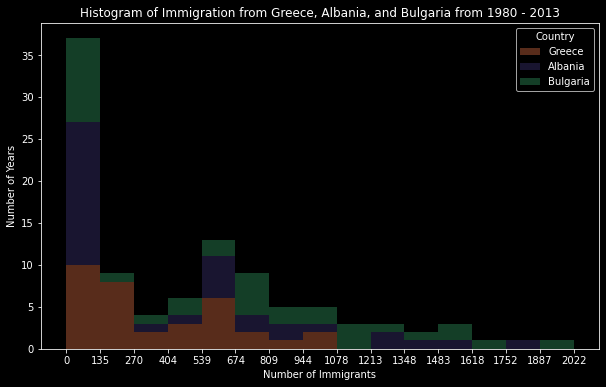

In [34]:
# Immigration for specific countries
df_t = df_can.loc[['Greece','Albania','Bulgaria'], years].transpose()

count, bin_edges = np.histogram(df_t, 15) # With 15 bins

df_t.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            stacked=True,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

### Barcharts

In [35]:
# Using iceland data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

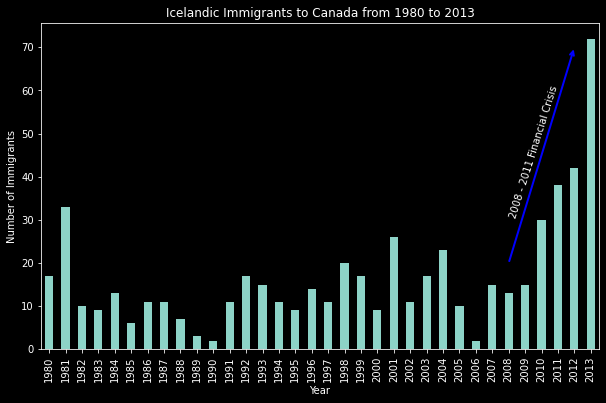

In [37]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate Arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

In [42]:
# Horizontal bar plot for 'total' data
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

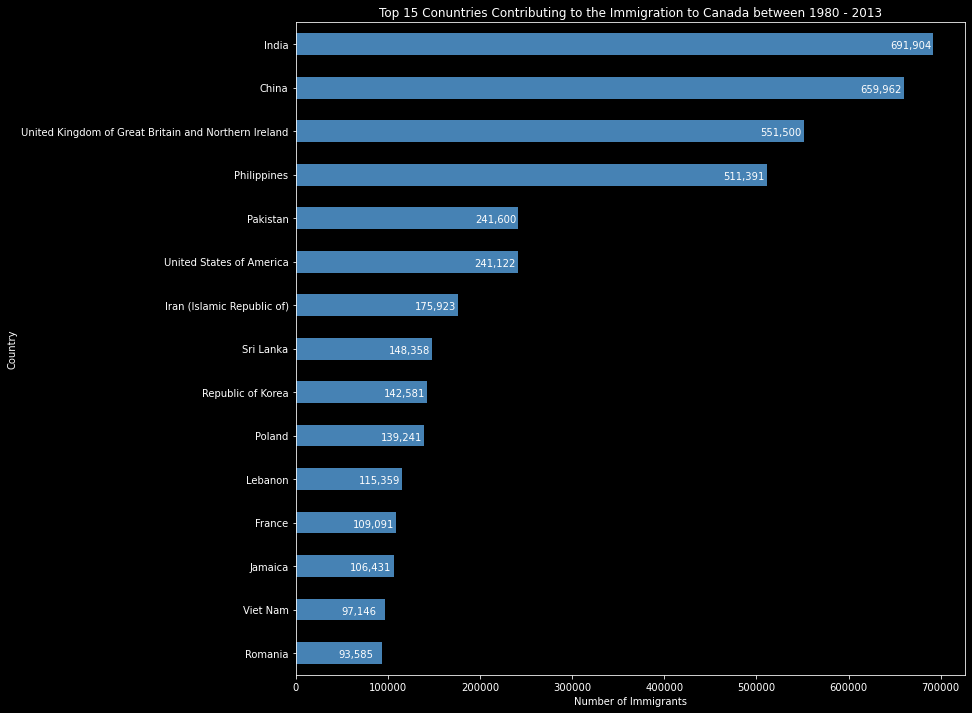

In [43]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

### Pie Charts

In [44]:
# Grouping by continents
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


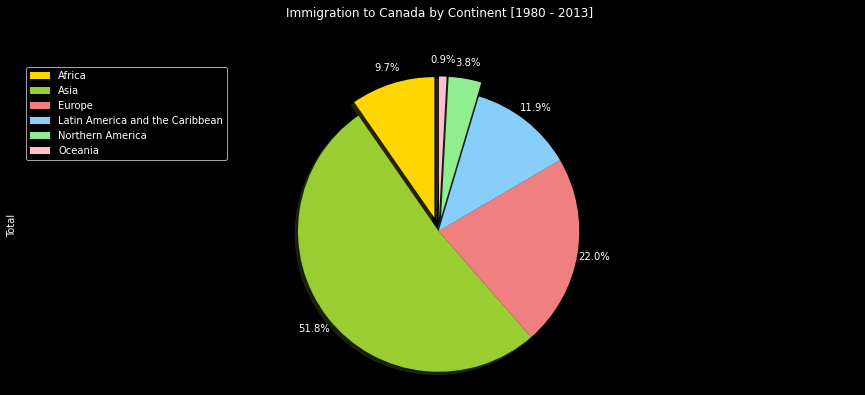

In [45]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

### Box Plots

In [47]:
# Looking at Japanese Immigrants for the years
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


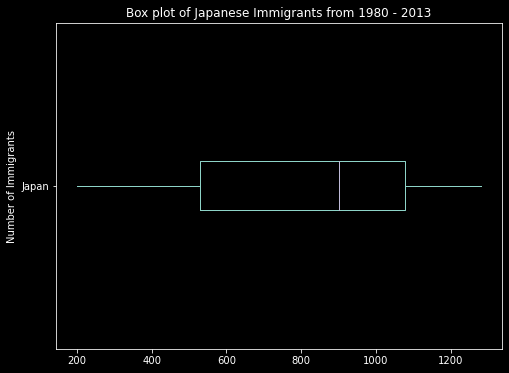

In [49]:
df_japan.plot(kind='box', figsize=(8, 6), vert = False) # vert determines whether plot is horizontal or not

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

### Scatter Plots

In [50]:
# Visualizing total immigration
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


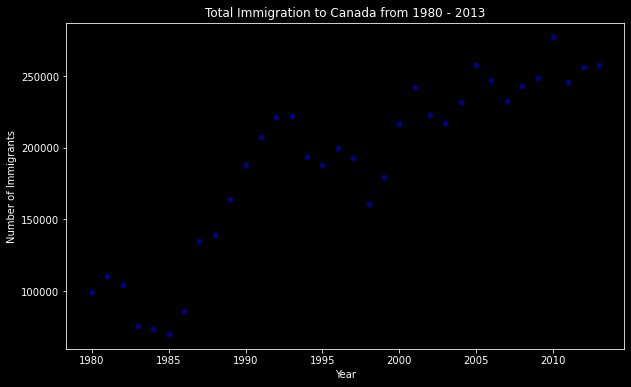

In [51]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

### Bubble Plots

In [52]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


In [53]:
# Brazil and Argentina
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

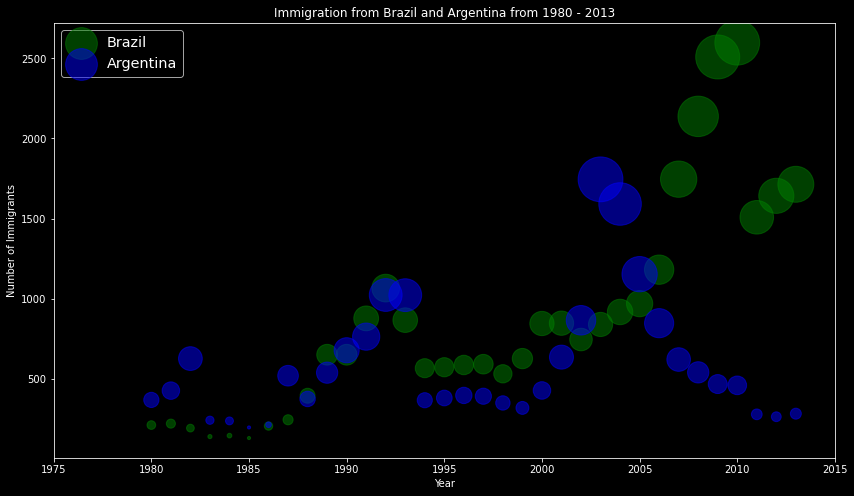

In [54]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')